In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_csv("/Users/vishaal/Desktop/important papers/train.csv")

# Extract features and target variable
y = data['SalePrice']
X = data[['OverallQual','GrLivArea',
          'GarageCars','GarageArea','TotalBsmtSF',
          '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
         'YearRemodAdd']]

In [7]:
#to check if there is any corrupt data
data.isna().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64

In [8]:
#z score normalisation
def feature_scaling(a):
    a = np.array(a)
    a = (a - np.mean(a)) / np.std(a)
    return a

X=feature_scaling(X)

In [10]:
#gradient descent
n=len(y)#length of data set
learning_rate=0.04
m = np.zeros(X.shape[1])  # Assuming X is a 2D array
c = 0
cost=[]
iterations=[]
for i in range(30000):
    dm=0
    dc=0
    
   
    # Calculate the predicted value
    y_pred = np.dot(X,m) + c
    cos = np.mean((y_pred - y) ** 2)
    cost.append(cos)
    iterations.append(i)
    
    # Update the partial derivatives
    dm += (1 / n) * np.dot(X.T,(y_pred - y))
    dc += (1/ n) * np.sum(y_pred - y)
    
    # Update m and c using the learning rate
    m -= learning_rate * dm
    c -= learning_rate * dc
print(m)
print(y_pred)  

[116247.24742633  56148.02278474  93087.80550697  69881.42887745
  32027.29894398    757.33972183  91648.37556855  87082.3198355
 264843.63514407 181266.33025914]
[158188.61326045 146981.7562157  152478.71263939 ...  85990.2105053
 177631.37021962 199691.25737708]


In [11]:
def accuracy(targets, prediction):
        residual_sum_square=np.sum((targets-prediction)**2)
        total_sum_square=np.sum((targets-np.mean(targets))**2)
        rsquared= 1-(residual_sum_square/total_sum_square)
        return rsquared

In [12]:

a=np.dot(X,m)+c
print(accuracy(y,a)*100,end=" ")
print("percent accuracy")

70.6211074590594 percent accuracy


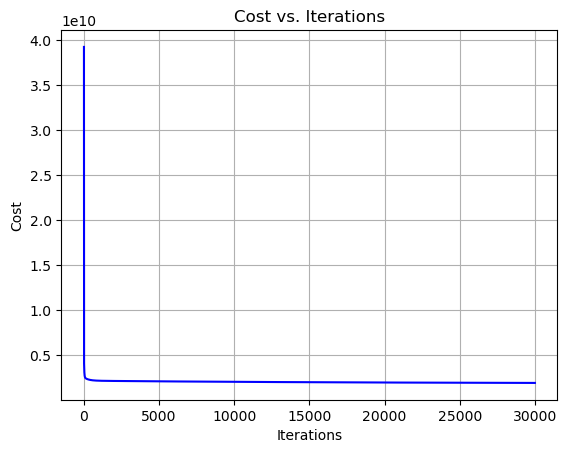

In [13]:
plt.plot(iterations, cost, color="blue")
plt.title('Cost vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

In [154]:
#now checking accuracy with test data
data = pd.read_csv("/Users/vishaal/Desktop/important papers/test.csv")

In [155]:
y_test = data['SalePrice']
X_test = data[['OverallQual','GrLivArea',
          'GarageCars','GarageArea','TotalBsmtSF',
          '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
         'YearRemodAdd']]
X_test=feature_scaling(X_test)
a=np.dot(X_test,m)+c
print(accuracy(y_test,a)*100,end=" ")
print("percent accuracy")

82.14847057021399 percent accuracy


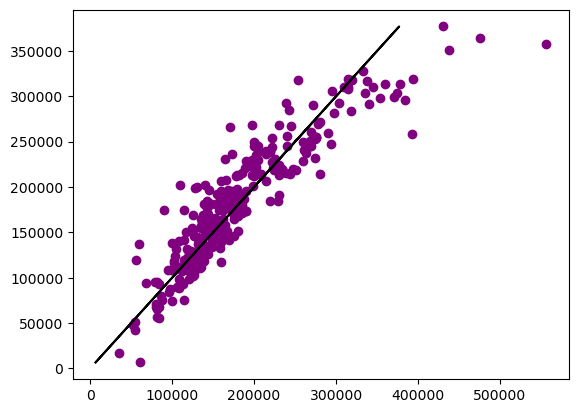

82.14847057021399 percent accuracy


In [156]:
#making graph using matplotlab
plt.scatter( y_test, a, color="purple")

# Plot the regression line
plt.plot( a,a, color="black")

# Display the plot
plt.show()

print(accuracy(y_test,a)*100,end=" ")
print("percent accuracy")